```
1. Define the Sequential model:
Add a Conv2D layer with 64 filters, 3x3 kernel size, 'relu' activation, and input shape (200, 200, 3)
Add another Conv2D layer with 64 filters, 3x3 kernel size, and 'relu' activation
Add a Dense layer with 64 units and 'relu' activation
Add another Dense layer with 64 units and 'relu' activation
Add a Flatten layer
Add a final Dense layer with 1 unit and 'sigmoid' activation

2. Compile the model:
Use the 'adam' optimizer
Set loss function to 'binary_crossentropy'
Track 'accuracy' as a metric

3. Train the model:
Use the model's fit method with the training data generator (train_generator)
Set the number of epochs to 10
Optionally, provide a test data generator (test_generator) for validation

4. Display the model architecture using model.summary()
```

In [7]:
!git clone https://github.com/cbtn-data-science-ml/ml_datasets.git

fatal: destination path 'ml_datasets' already exists and is not an empty directory.


In [9]:
import os
os.chdir('ml_datasets')

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'ramen_sushi/train/',
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    'ramen_sushi/test/',
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

```
2. Compile the model:
Use the 'adam' optimizer
Set loss function to 'binary_crossentropy'
Track 'accuracy' as a metric
```

In [12]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


2024-06-03 08:57:41.650636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-06-03 08:57:41.654334: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - ETA: 0s - loss: 1.1026 - accuracy: 0.5793

2024-06-03 08:58:16.192047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 37s 791ms/step - loss: 1.1026 - accuracy: 0.5793 - val_loss: 0.6377 - val_accuracy: 0.6320
Epoch 2/10
47/47 [==============================] - 38s 801ms/step - loss: 0.5293 - accuracy: 0.7427 - val_loss: 0.5657 - val_accuracy: 0.7180
Epoch 3/10
47/47 [==============================] - 37s 788ms/step - loss: 0.4468 - accuracy: 0.7840 - val_loss: 0.5301 - val_accuracy: 0.7720
Epoch 4/10
47/47 [==============================] - 37s 788ms/step - loss: 0.3057 - accuracy: 0.8813 - val_loss: 0.5255 - val_accuracy: 0.7760
Epoch 5/10
47/47 [==============================] - 36s 775ms/step - loss: 0.1324 - accuracy: 0.9527 - val_loss: 0.8694 - val_accuracy: 0.7280
Epoch 6/10
47/47 [==============================] - 36s 770ms/step - loss: 0.0707 - accuracy: 0.9760 - val_loss: 0.6944 - val_accuracy: 0.7520
Epoch 7/10
47/47 [==============================] - 36s 765ms/step - loss: 0.0151 - accuracy: 0.9967 - val_loss: 1.0433 - val_accuracy: 0.7540
Epoch 8/10

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
history.history

{'loss': [1.1026191711425781,
  0.5293057560920715,
  0.4468275010585785,
  0.30571654438972473,
  0.13241295516490936,
  0.07070636004209518,
  0.015118435956537724,
  0.0027273190207779408,
  0.0006468375795520842,
  0.0003617334004957229],
 'accuracy': [0.5793333053588867,
  0.7426666617393494,
  0.7839999794960022,
  0.8813333511352539,
  0.9526666402816772,
  0.9760000109672546,
  0.996666669845581,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.637681782245636,
  0.5656760931015015,
  0.5301265716552734,
  0.5255385041236877,
  0.869430661201477,
  0.6944402456283569,
  1.0432895421981812,
  1.071781039237976,
  1.0990787744522095,
  1.151759147644043],
 'val_accuracy': [0.6320000290870667,
  0.7179999947547913,
  0.7720000147819519,
  0.7760000228881836,
  0.7279999852180481,
  0.7519999742507935,
  0.7540000081062317,
  0.75,
  0.7519999742507935,
  0.7540000081062317]}

In [17]:
history.history['loss']

[1.1026191711425781,
 0.5293057560920715,
 0.4468275010585785,
 0.30571654438972473,
 0.13241295516490936,
 0.07070636004209518,
 0.015118435956537724,
 0.0027273190207779408,
 0.0006468375795520842,
 0.0003617334004957229]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

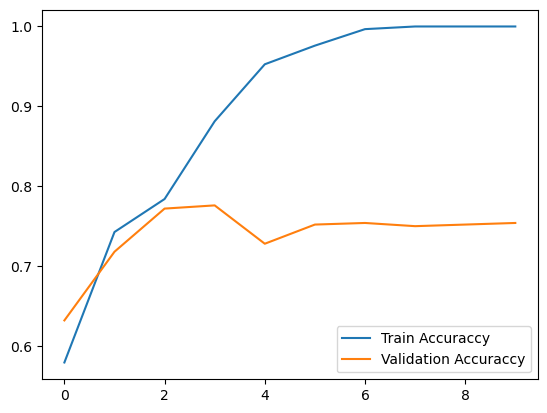

In [24]:
plt.plot(epochs, acc, label='Train Accuraccy')
plt.plot(epochs, val_acc, label='Validation Accuraccy')
plt.legend(loc='lower right')

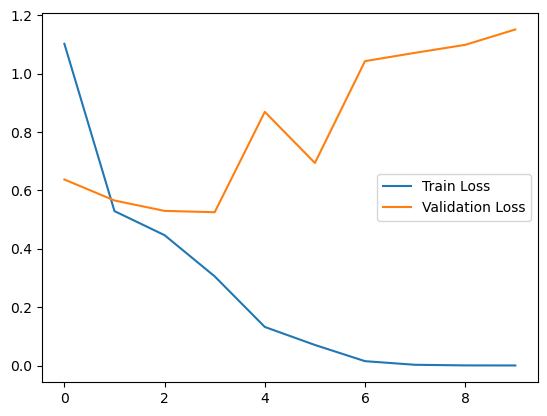

In [27]:
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='center right')

<Axes: >

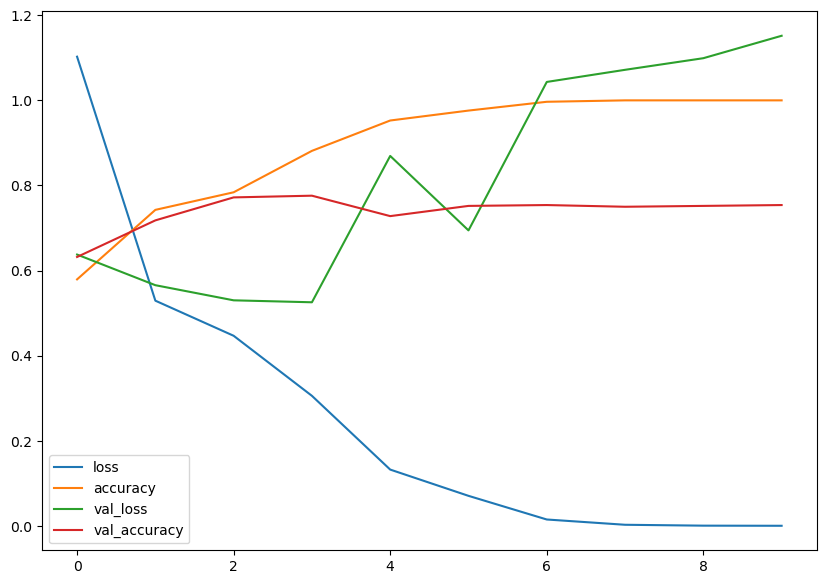

In [28]:
pd.DataFrame(history.history).plot(figsize=(10,7))